In [1]:
import sanemax as sn
import numpy as np
import matplotlib.pyplot as plt


# Have some default disk spacings
spacings = np.array([
            1.00334, 6.94754, 7.1766, 7.22788, 7.19717, 7.23776, 7.07746, 7.57173,
            7.08019, 7.24657, 7.21708, 7.18317, 7.13025, 7.2198, 7.45585, 7.39873, 
            7.15403, 7.14252, 6.83105, 7.42282
        ]) * 1e-3

## Generate variations

In [2]:
N = 10 # Number of variations
frac = 0.001 # Variation strength
# Generate
cfgs = np.tile(spacings, (N,1)) * np.random.uniform(1-frac,1+frac, (N, len(spacings)))

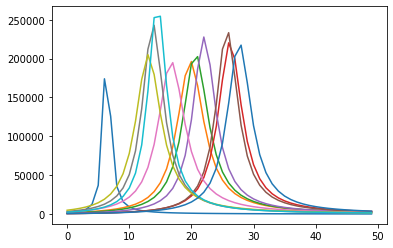

In [3]:
# Plot some
plt.plot(sn.sim.boost(np.linspace(22, 22.1, 50), spacings=spacings))
for row in cfgs[:10]:
    plt.plot(sn.sim.boost(np.linspace(22, 22.03, 50), spacings=row))

# Check disk spacings 

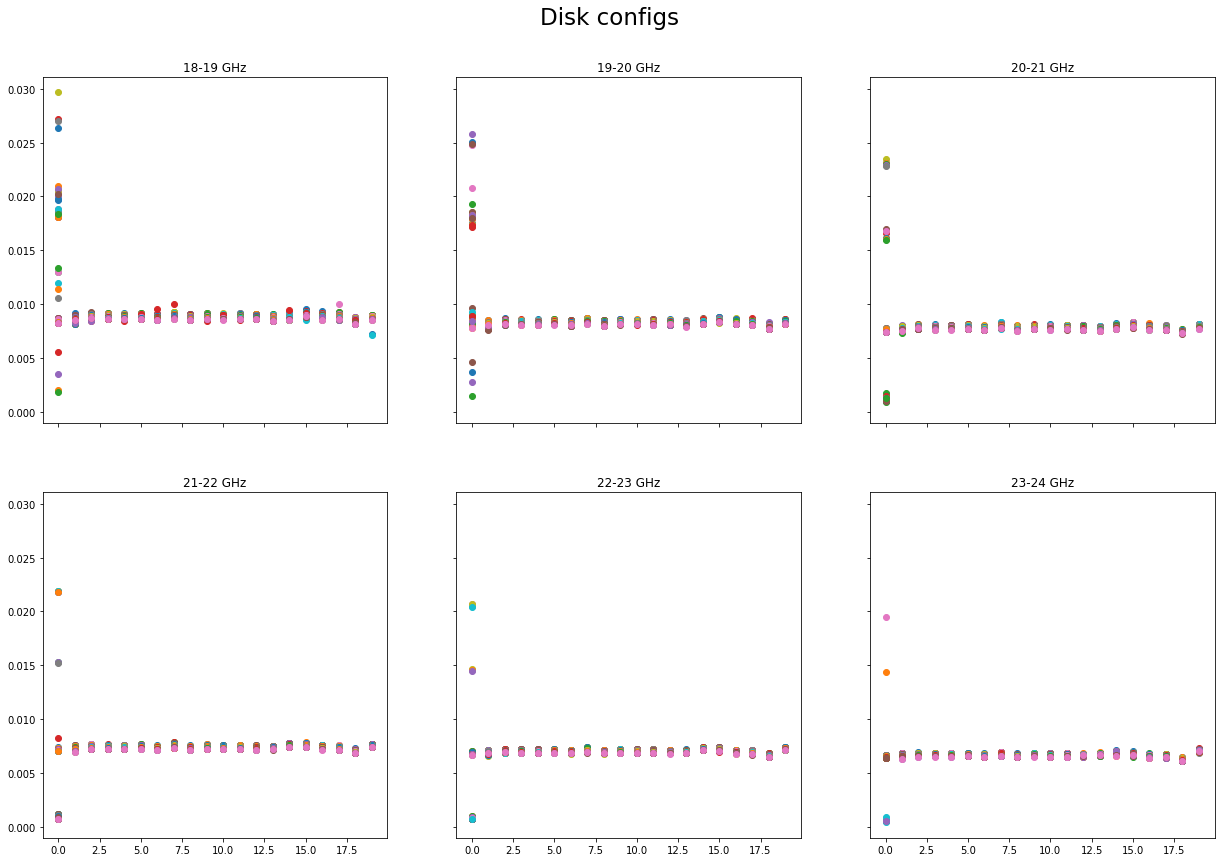

In [7]:
def from_jld(i):
    import h5py
    f = h5py.File('datasets/frequency_scaling_{}_{}.jld2'.format(18+i, 19+i), 'r')
    return f['spacs'][()]
    
    
fig, axs = plt.subplots(2, 3, figsize=(21,14), sharex=True, sharey=True)
axs = axs.flatten()
for i in range(6):
    for row in from_jld(i):
        axs[i].scatter(range(len(row)), row)
        axs[i].set_title('{}-{} GHz'.format(18+i, 19+i))
plt.suptitle('Disk configs', fontsize=23, y=0.95);

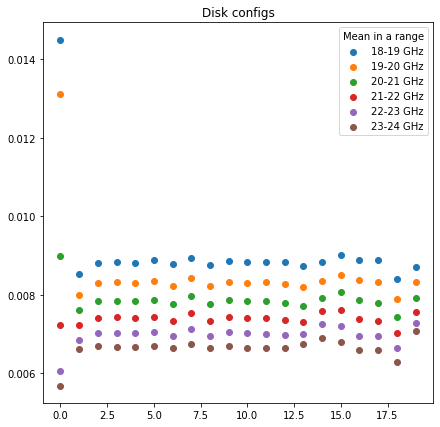

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
for i in range(6):
    row = np.mean(from_jld(i), axis=0)
    ax.scatter(range(len(row)), row, label='{}-{} GHz'.format(18+i, 19+i))
ax.set_title('Disk configs')
ax.legend(title='Mean in a range');

(1.0, 1739253.078113808)

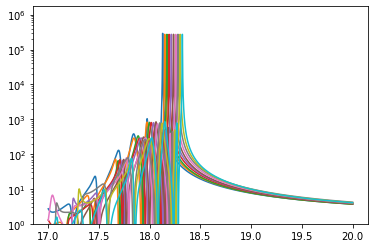

In [9]:
fig, ax = plt.subplots()
freq_vals = np.linspace(17, 20, 500000)
for row in from_jld(0)[5:15]:
    plt.plot(freq_vals, sn.sim.boost(freq_vals, spacings=row))
plt.semilogy()
plt.ylim(1e0, None)